In [9]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [10]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse_logf (control parameters: ['p_A', 'logf', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [98]:
"""Base settings"""

directory = r'D:\parameter_studies\2_plus_1_gradient_search\1_atm_smarg_gd_wide_logf'
'''
1_atm:
    best energy_efficiency:  1198.5186 MJ/kg
    avarage best energy_efficiency:  2.0574e+23 MJ/kg
    average file length: 91.18 rows
1_atm_gd_smaller_intervals:
    best energy_efficiency:  869.2908 MJ/kg
    avarage best energy_efficiency:  4.6498e+24 MJ/kg
    average file length: 117.92 rows
1_atm_gd_smaller_intervals_logf:
    best energy_efficiency:  868.1620 MJ/kg
    avarage best energy_efficiency:  1.9965e+24 MJ/kg
    average file length: 118.12 rows
1_atm_grad_method:
    best energy_efficiency:  35689062.3888 MJ/kg
    avarage best energy_efficiency:  1.1523e+23 MJ/kg
    average file length: 232.93 rows
1_atm_smargd_gd:
    best energy_efficiency:   870.9243 MJ/kg
    avarage best energy_efficiency:   936.4129 MJ/kg
    max best energy_efficiency:   997.9220 MJ/kg
    average file length:  185.29 rows
1_atm_smarg_gd_logf:
    best energy_efficiency:   874.5339 MJ/kg
    avarage best energy_efficiency:   933.8929 MJ/kg
    max best energy_efficiency:   1023.8198 MJ/kg
    average file length:  195.86 rows
1_atm_smarg_gd_wide:
    best energy_efficiency:   892.6978 MJ/kg
    avarage best energy_efficiency:   936.3244 MJ/kg
    max best energy_efficiency:   987.0282 MJ/kg
    average file length:  180.81 rows
1_atm_smarg_gd_wide_logf:
    best energy_efficiency:   873.1011 MJ/kg
    avarage best energy_efficiency:   940.2353 MJ/kg
    max best energy_efficiency:   1003.4410 MJ/kg
    average file length:  170.29 rows
'''
file_base_name = 'output_'

In [99]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
file_lens = []
mins = []
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))

        # Cast object-dtype columns with all-bool values to bool dtype
        for col in current_data.columns:
            if current_data[col].dtype == 'object' and all(current_data[col].dropna().map(lambda x: isinstance(x, bool))):
                current_data[col] = current_data[col].astype(bool)

        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
        file_lens.append(current_data.shape[0])
        mins.append(current_data['energy_efficiency'].min())
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (1000 rows)
	output_10.csv            (  95 rows)
	output_11.csv            ( 128 rows)
	output_12.csv            ( 137 rows)
	output_13.csv            ( 124 rows)
	output_14.csv            ( 138 rows)
	output_15.csv            ( 142 rows)
	output_16.csv            ( 123 rows)
	output_17.csv            ( 156 rows)
	output_18.csv            ( 215 rows)
	output_19.csv            ( 154 rows)
	output_2.csv             (  89 rows)
	output_20.csv            ( 149 rows)
	output_21.csv            ( 128 rows)
	output_3.csv             ( 111 rows)
	output_4.csv             ( 101 rows)
	output_5.csv             ( 100 rows)
	output_6.csv             ( 102 rows)
	output_7.csv             ( 118 rows)
	output_8.csv             ( 141 rows)
	output_9.csv             ( 125 rows)
_______________________________________
total number of files: 21
total:      3576    rows   ( 100.00 %)
xx0:        3453    rows   (  96.56 %)	succecfully solved with LSODA solver
xx1:    

In [100]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 3485 rows ( 97.46 %)


In [101]:
print(f'    best energy_efficiency:  {good_data["energy_efficiency"].min(): .4f} MJ/kg')
mins = np.array(mins)
file_lens = np.array(file_lens)
print(f'    avarage best energy_efficiency:  {mins.mean(): .4f} MJ/kg')
print(f'    max best energy_efficiency:  {mins.max(): .4f} MJ/kg')
print(f'    average file length: {file_lens.mean(): .2f} rows')

    best energy_efficiency:   873.1011 MJ/kg
    avarage best energy_efficiency:   940.2353 MJ/kg
    max best energy_efficiency:   1003.4410 MJ/kg
    average file length:  170.29 rows


In [102]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,gases,fractions,...,steps,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency,p_A,logf,n
126,701,0.000078,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12368,0.000061,4763.775548,7.759431e-13,0.0,1.153784e-05,8.731011e+02,-193161.570580,4.133741,1.0
125,701,0.000078,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12489,0.000061,4763.785006,7.759470e-13,0.0,1.153793e-05,8.731035e+02,-193161.367930,4.133739,1.0
124,701,0.000078,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12960,0.000061,4763.772805,7.759516e-13,0.0,1.153800e-05,8.731038e+02,-193161.570580,4.133739,1.0
123,701,0.000078,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,10288,0.000061,4763.789884,7.759500e-13,0.0,1.153798e-05,8.731040e+02,-193161.570580,4.133739,1.0
122,701,0.000078,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,10288,0.000061,4763.789884,7.759500e-13,0.0,1.153798e-05,8.731040e+02,-193161.570580,4.133739,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,821,0.000373,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,14775,0.000070,406.288186,2.318572e-48,0.0,6.552460e-06,1.659410e+38,-252653.873966,4.496535,1.0
517,528,0.000147,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,4983,0.000028,422.574778,2.034373e-50,0.0,6.489362e-07,1.873015e+39,-250842.462512,4.849387,1.0
623,632,0.000367,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,5988,0.000060,311.571122,1.428984e-51,0.0,6.896392e-08,2.833769e+39,-205388.394151,4.985834,1.0
794,800,0.000083,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,4015,0.000017,431.281802,8.709207e-52,0.0,1.722108e-07,1.161052e+40,-275654.349442,5.069620,1.0


In [48]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args].describe()

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,surfactant,elapsed_time,steps,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency,p_A,logf,n
count,4559.0,4559.000000,4559.0,4559.0,4.559000e+03,4.559000e+03,4559.000000,4559.000000,4559.0,4559.000000,4559.000000,4559.000000,4559.000000,4.559000e+03,4559.0,4.559000e+03,4.559000e+03,4559.000000,4559.000000,4559.0
mean,0.0,0.000457,1.0,101325.0,3.500000e-01,3.031500e+02,4245.125716,0.000815,1.0,6.088505,19791.485633,0.000082,614.456836,9.187614e-14,0.0,1.136390e-05,9.627030e+114,-171175.060185,4.891974,1.0
std,0.0,0.000242,0.0,0.0,5.551724e-17,5.684965e-14,0.000000,0.000000,0.0,8.120372,17152.477025,0.000035,878.997284,6.578694e-13,0.0,3.502049e-05,6.456201e+116,95151.961985,0.587497,0.0
min,0.0,0.000001,1.0,101325.0,3.500000e-01,3.031500e+02,4245.125716,0.000815,1.0,0.424704,1980.000000,0.000005,303.163269,-2.049821e-24,0.0,8.778695e-15,1.198519e+03,-323531.413995,4.000172,1.0
25%,0.0,0.000270,1.0,101325.0,3.500000e-01,3.031500e+02,4245.125716,0.000815,1.0,1.799905,7557.000000,0.000060,303.644042,-8.908865e-35,0.0,7.789580e-10,6.762206e+21,-303995.265000,4.382372,1.0
50%,0.0,0.000437,1.0,101325.0,3.500000e-01,3.031500e+02,4245.125716,0.000815,1.0,3.312545,13080.000000,0.000077,310.023517,-2.111495e-48,0.0,7.640072e-08,1.000000e+30,-101304.735000,4.886708,1.0
75%,0.0,0.000678,1.0,101325.0,3.500000e-01,3.031500e+02,4245.125716,0.000815,1.0,7.090543,26294.000000,0.000114,451.005104,3.247064e-34,0.0,5.008025e-06,1.000000e+30,-101304.735000,5.460517,1.0
max,0.0,0.001000,1.0,101325.0,3.500000e-01,3.031500e+02,4245.125716,0.000815,1.0,57.936039,111567.000000,0.000160,6208.719620,6.682985e-12,0.0,2.847853e-04,4.359155e+118,-86376.075876,5.978836,1.0


succecfully solved with LSODA solver


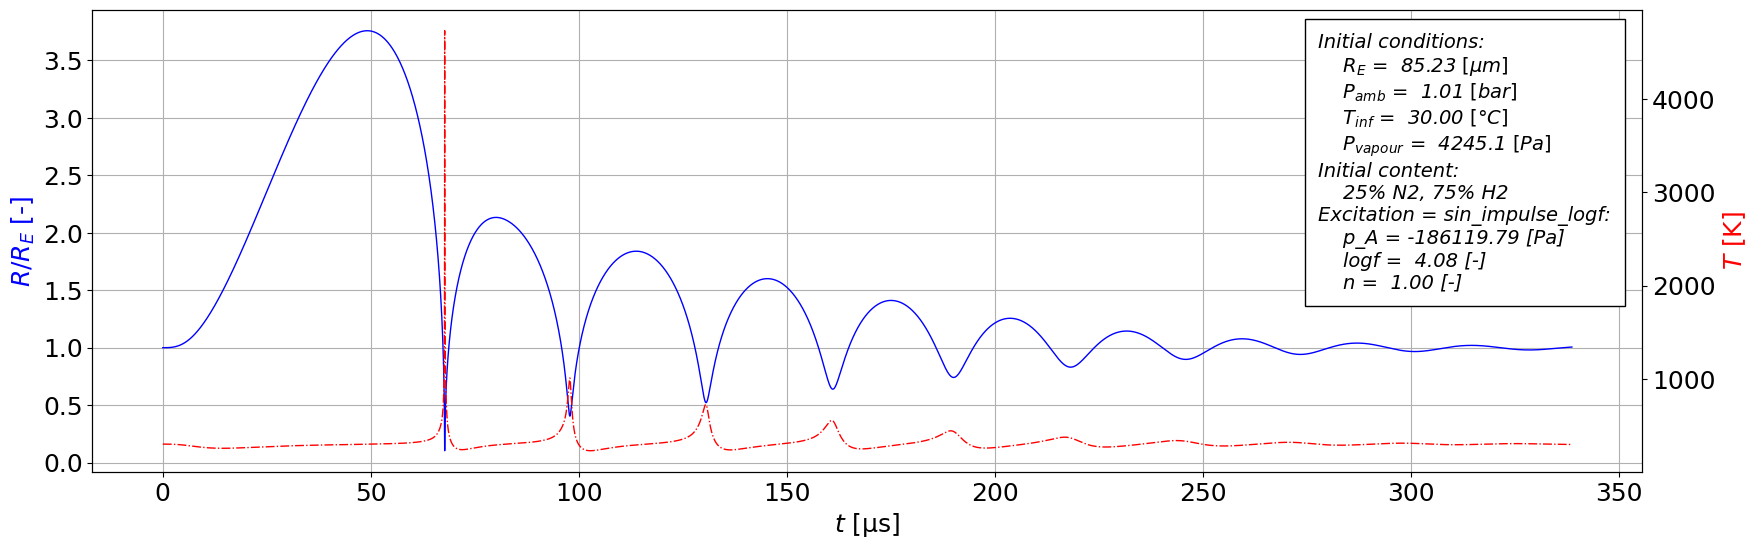

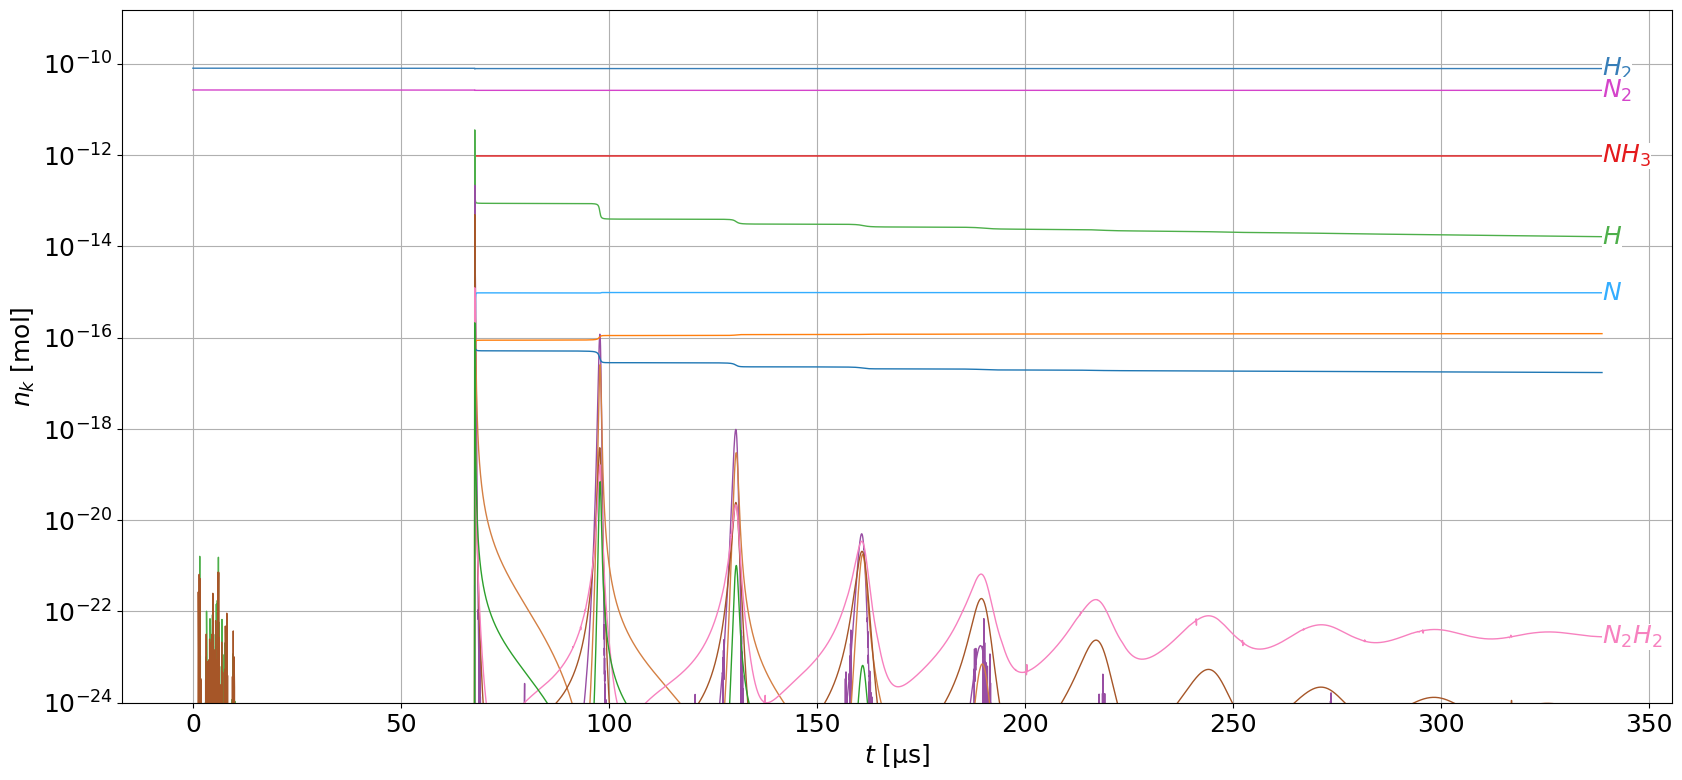

Control parameters:
    ID = 0
    R_E = 85.23 [um]
    ratio = 1.00 [-]
    P_amb = 1.01 [bar]
    alfa_M = 0.35 [-]
    T_inf = 30.00 [°C]
    P_v = 4245.13 [Pa]
    mu_L = 0.81 [mPa*s]
    surfactant = 1.00 [-]    
    excitation = 'sin_impulse_logf'
    (p_A =-186119.79 [Pa]; logf = 4.08 [-]; n = 1.00 [-])
    Initial content: 25% N2, 75% H2
Simulation info:
    error_code = 0 (success = True)
    elapsed_time = 1.10 [s]
    steps = 12426 [-]
Final state:
    R_final = 84.98 [um];   R_dot_final =-2.0817087904543553e-12 [m/s];   T_final = 303.15 [K]
    n_NH3_final = 9.49e-13 [mol]
    Final molar concentrations: [mol/cm^3]
        NH3   :    3.692854220668245e-07;    H2    :   3.0376972091377617e-05;    H     :  -1.2575655220619064e-20;    NH2   :   -2.512224569709909e-23;    
        NH    :    7.198986554758778e-23;    N     :     5.93348889209537e-12;    NNH   :  -5.5665000144855195e-31;    N2H4  :   2.6552215987344785e-12;    
        N2H3  :   5.1358277426755614e-11;    N2H2  

In [34]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[1])   # choose the most energy efficient one
de.plot(cpar, show_legend=False)